# The Sparks Foundation: Data Science & Business Analytics Internship
# Author: Prathamshree Gupta
# Task: Exploratory Data Analysis - Retail
# #GRIPJULY22

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("SampleSuperstore.csv")
data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [3]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
print('Dataset Shape: ',data.shape)

Dataset Shape:  (9994, 13)


In [5]:
print("Name of columns :\n ",data.columns)

Name of columns :
  Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')


In [6]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [7]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# Data Cleaning

In [8]:
data.isnull().any()

Ship Mode       False
Segment         False
Country         False
City            False
State           False
Postal Code     False
Region          False
Category        False
Sub-Category    False
Sales           False
Quantity        False
Discount        False
Profit          False
dtype: bool

In [9]:
data.duplicated().sum()

17

### There are 17 duplicate values in the dataset
### Dropping the duplicate values in the step below

In [10]:
data = data.drop_duplicates()

In [11]:
data.shape

(9977, 13)

# Analysis

In [12]:
import warnings 
warnings.filterwarnings('ignore')

<Figure size 1296x864 with 0 Axes>

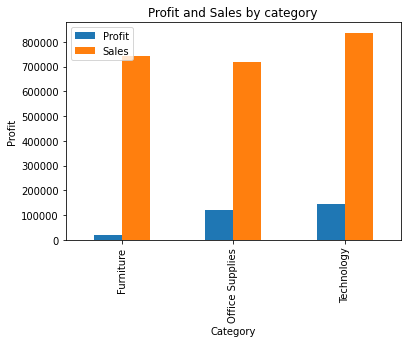

In [13]:
plt.figure(figsize= (18,12))
data.groupby('Category')['Profit','Sales'].sum().plot.bar()
plt.ylabel('Profit')
plt.title("Profit and Sales by category")
plt.legend(loc = 2)
plt.show()

### The above Bar Plot shows that "Technology" has given maximum sales with maximum Profit.
### Also, the category "Office Supplies" following the same trend.
### But the category "Furniture" is not doing good.
### Sales of Furniture is more than that of Office Supplies but the Profit is very less compared to other Categories.
### Maximum Profit - by Technology
### Minimum Profit - by Furniture

In [14]:
furniture_data = data[data["Category"]== "Furniture"]

In [15]:
furniture_data.shape

(2118, 13)

<Figure size 1296x864 with 0 Axes>

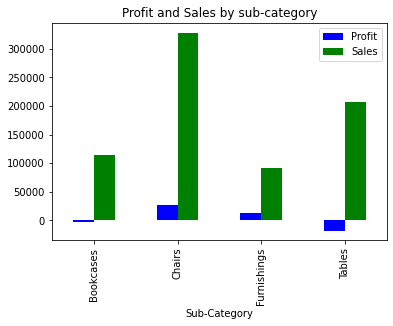

In [16]:
plt.figure(figsize= (18,12))
furniture_data.groupby('Sub-Category')['Profit','Sales'].sum().plot.bar(color = ['blue','green'])
plt.title('Profit and Sales by sub-category')
plt.legend(loc = 1)
plt.show()

### By observing this bar plot its clearly visible that the Sub-Categories "Bookcases" and "Tables" are making loss which affecting the whole Furniture Category 

# Checking possible reasons for loss

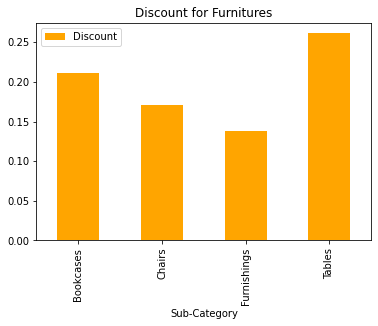

In [17]:
furniture_data.groupby("Sub-Category")["Discount"].mean().plot.bar(color =['orange'])
plt.title('Discount for Furnitures')
plt.legend(loc = 0)
plt.show()

### The discounts given on Bookcases and Tables are on higher side

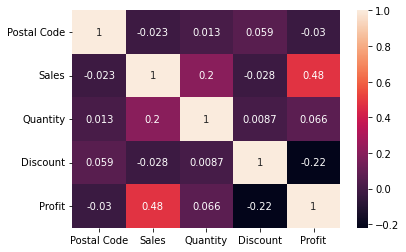

In [18]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True)
plt.show()

### From this heatmap we can see that the correlation between Profit and Discount is negative

### And the correlation between Profit and Sales is positive

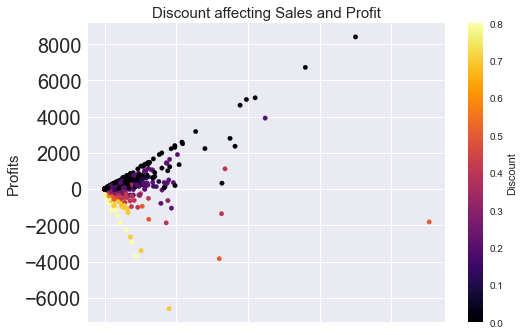

In [19]:
plt.style.use('seaborn')
data.plot(kind = 'scatter', x= 'Sales', y=  'Profit', s= 20 ,c= 'Discount' , fontsize = 20,colormap = 'inferno'   )
plt.ylabel('Profits', fontsize = 15)
plt.title('Discount affecting Sales and Profit' , fontsize = 15)
plt.show()

### The scatter plot represents the effect of Discount on Sales and Profit. Dark colour represents the lesser discount (Higher Profit) and light colour shows the high discount (Less Profit)

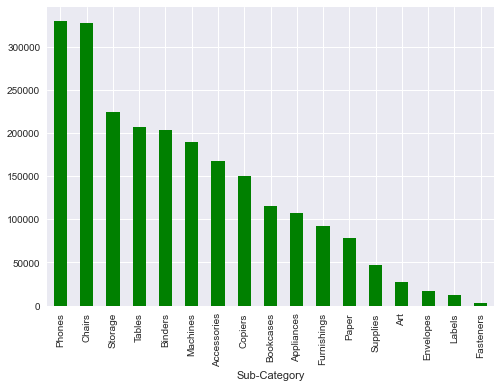

In [20]:
data.groupby("Sub-Category")["Sales"].sum().sort_values(ascending=False).plot.bar(color="green")
plt.show()

### By seeing the above Bar Plot its clear that "Phones", "Chairs","Storage","Tables" and "Binders" are the highest in Sales. And the "Fasteners", "Labels" and "Envelops" has the least Sales

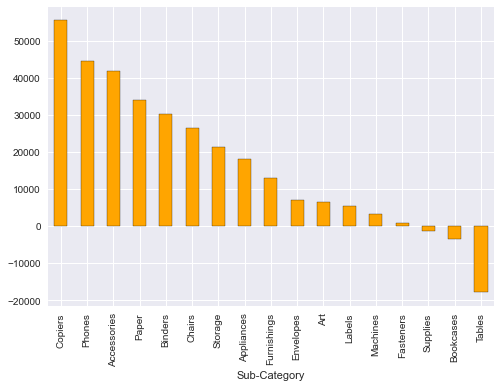

In [21]:
data.groupby("Sub-Category")["Profit"].sum().sort_values(ascending=False).plot.bar(color="orange", edgecolor="black")
plt.show()

### "Copiers", "Phones","Accessories" and "Paper" giving the highest profit, whereas "Tables","Bookcases", and "Supplies" are loss making products to the store.

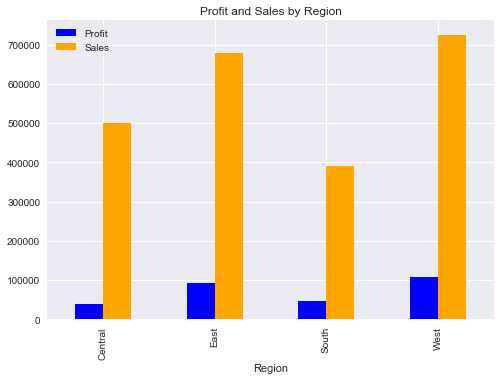

In [22]:
# Region wise Sales and Profit
data.groupby('Region')["Profit","Sales"].sum().plot.bar(color = ['blue','orange'])
plt.title("Profit and Sales by Region")
plt.legend(loc= "best")
plt.show()

### Here we can see that the West region has done the maximum Sales followed by the East region, and then the Central region
### South region has done the least sales
### Highest Profit- in West region, Lowest Profit- in Central region

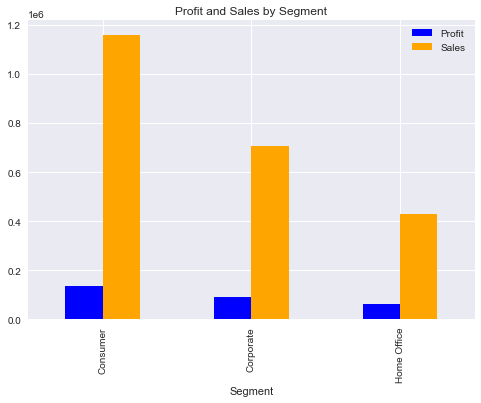

In [23]:
# Segment wise Sales and Profit
data.groupby('Segment')["Profit","Sales"].sum().plot.bar(color=['blue','orange'])
plt.title("Profit and Sales by Segment")
plt.legend(loc = "best")
plt.show()

### From above graph - The "Customer" segment has the maximum buying capacity and its giving the maximum profit as well

# Observations

### Sales of "Furniture" is comparatively more but the "Profit" is less.
### "Bookcases" and "Tables" are making loss which affecting the whole "Furniture" Category.
### Discounts given on "Bookcases" and "Tables" are on higher side
### Positive Correlation - Profit and Sales
### Negative Correlation - Profit and Discount
### Highest Sales by -"Phones", "Chairs","Storage","Tables" and "Binders".
### "Fasteners", "Labels" and "Envelops" has the least Sales.
### Highest Profit by - "Copiers", "Phones","Accessories" and "Paper".
### Loss making products - "Tables","Bookcases", and "Supplies"
### Maximum Sales by - West Region
### Minimum sales by - South Region
### Highest Profit by - West Region
### Lowest Profit by - Central Region
### "Customer" segment has the maximum buying capacity with Maximum Profit

# Conclusion

### Need to work on the weak area i.e., the Furniture Category
### Need to reduce discounts on "Tables" and "Bookcases" in order to increase the Profit